In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


h_X = pd.read_csv('data_clean/train_h_X_v1.csv')
h_y = pd.read_csv("data_clean/train_h_y.csv")

no_ads_X = pd.read_csv('data_clean/train_no_ads_X_v1.csv')
no_ads_y = pd.read_csv('data_clean/train_no_ads_y.csv')

print(no_ads_X.shape)
print(no_ads_y.shape)

(12774, 112)
(12774, 1)


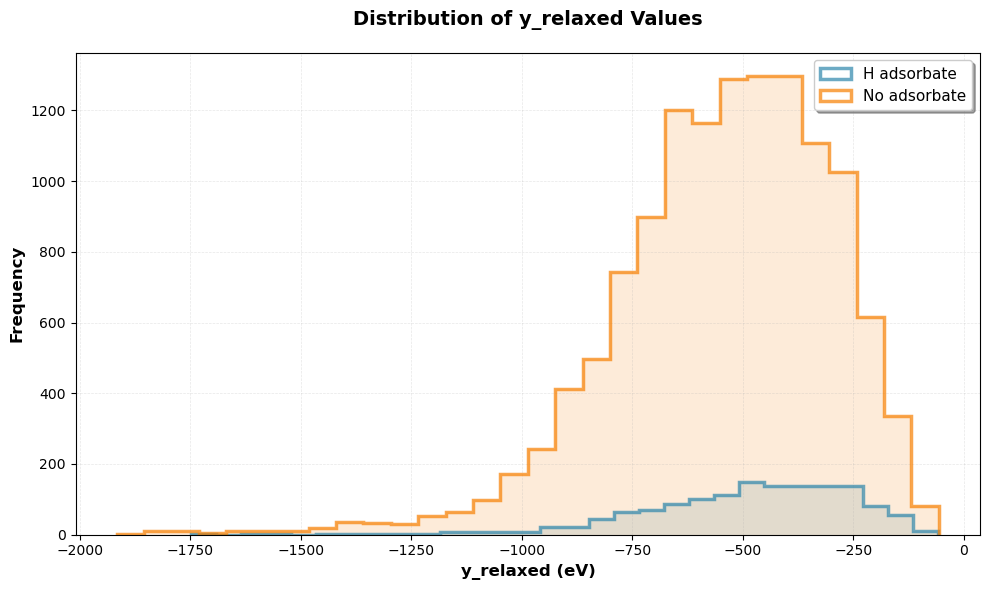

In [2]:
# Create figure with better size and resolution
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Plot histograms as step curves (no overlap issues)
ax.hist(h_y, bins=30, alpha=0.7, color='#2E86AB', label='H adsorbate', histtype='step', linewidth=2.5)
ax.hist(no_ads_y, bins=30, alpha=0.7, color='#F77F00', label='No adsorbate', histtype='step', linewidth=2.5)

# Optional: add fill under the lines for better visibility
ax.hist(h_y, bins=30, alpha=0.15, color='#2E86AB', histtype='stepfilled')
ax.hist(no_ads_y, bins=30, alpha=0.15, color='#F77F00', histtype='stepfilled')

ax.set_xlabel('y_relaxed (eV)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Distribution of y_relaxed Values', fontsize=14, fontweight='bold', pad=20)

ax.legend(loc='upper right', frameon=True, shadow=True, fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

## Check Data Distribution

In [3]:
# Make sure X and y are aligned
print(len(h_X), len(h_y))
print(h_X.index.equals(h_y.index))

print(len(no_ads_X), len(no_ads_y))
print(no_ads_X.index.equals(no_ads_y.index))

1411 1411
True
12774 12774
True


In [4]:
# Check target distribution
print(h_y.describe())
print(f"h_y has missing values? {h_y.isna().sum()}")  # Any missing values?
print(f"f_y has 0 values? {(h_y == 0).sum()}")  # Many zeros?

         y_relaxed
count  1411.000000
mean   -484.889476
std     229.531603
min   -1747.629416
25%    -619.847125
50%    -455.833953
75%    -314.403464
max     -59.024696
h_y has missing values? y_relaxed    0
dtype: int64
f_y has 0 values? y_relaxed    0
dtype: int64


## Cross Validation

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


h_X_train, h_X_test, h_y_train, h_y_test = train_test_split(
    h_X, 
    h_y, 
    test_size=0.2, 
    random_state=1065)

h_scaler = StandardScaler()
h_X_train_scaled = h_scaler.fit_transform(h_X_train)
h_X_test_scaled = h_scaler.transform(h_X_test)

no_ads_X_train, no_ads_X_test, no_ads_y_train, no_ads_y_test = train_test_split(
    no_ads_X, 
    no_ads_y, 
    test_size=0.2, 
    random_state=1065)

no_ads_scaler = StandardScaler()
no_ads_X_train_scaled = no_ads_scaler.fit_transform(no_ads_X_train)
no_ads_X_test_scaled = no_ads_scaler.transform(no_ads_X_test)


In [6]:
from sklearn.dummy import DummyRegressor

h_baseline = DummyRegressor(strategy='mean')
h_baseline.fit(h_X_train_scaled, h_y_train)
print(f"h-ads Baseline R²: {h_baseline.score(h_X_train_scaled, h_y_train)}")

no_ads_baseline = DummyRegressor(strategy='mean')
no_ads_baseline.fit(no_ads_X_train_scaled, no_ads_y_train)
print(f"no-ads Baseline R²: {h_baseline.score(no_ads_X_train_scaled, no_ads_y_train)}")

h-ads Baseline R²: 0.0
no-ads Baseline R²: -0.08849777842323148


### Baseline with simple linear regression

no penalty; all features are retained

--- h dataset ---
linear regression training R^2 (CV): 0.360
linear regression test R^2: 0.329
--- no-ads dataset ---
linear regression training R^2 (CV): 0.377
linear regression test R^2: 0.401


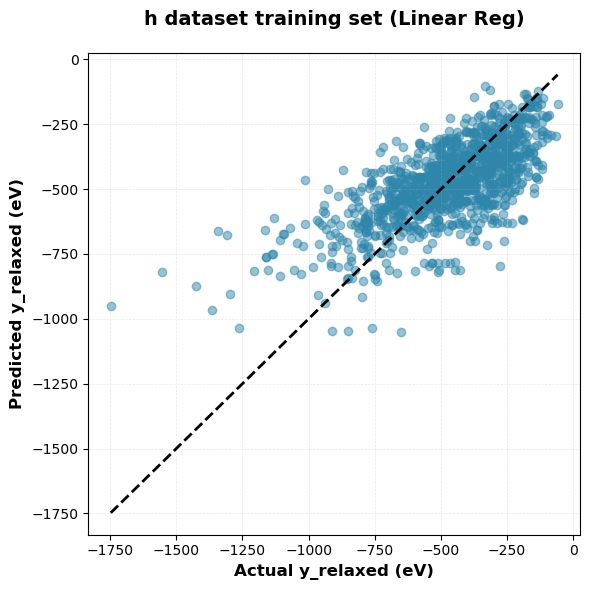

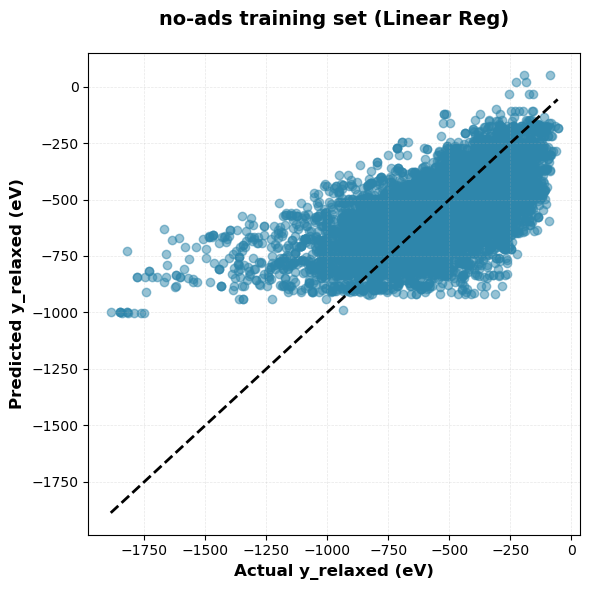

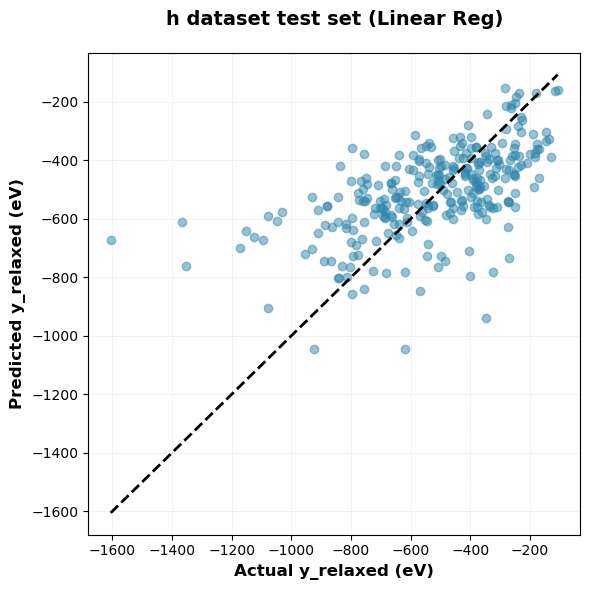

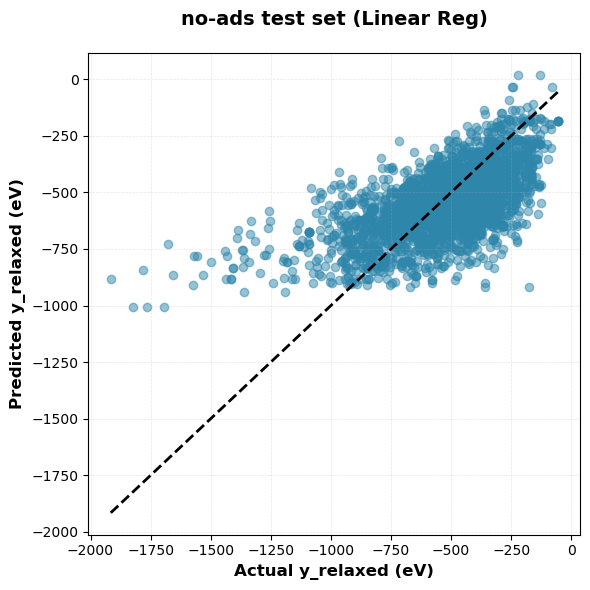

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


h_lr = LinearRegression()
h_lr.fit(h_X_train_scaled, h_y_train)
h_cv = cross_val_score(h_lr, h_X_train_scaled, h_y_train, cv=5, scoring='r2')
print("--- h dataset ---")
print(f"linear regression training R^2 (CV): {h_cv.mean():.3f}")
print(f"linear regression test R^2: {h_lr.score(h_X_test_scaled, h_y_test):.3f}")


no_ads_lr = LinearRegression()
no_ads_lr.fit(no_ads_X_train_scaled, no_ads_y_train)
no_ads_cv = cross_val_score(no_ads_lr, no_ads_X_train_scaled, no_ads_y_train, cv=5, scoring='r2')
print("--- no-ads dataset ---")
print(f"linear regression training R^2 (CV): {no_ads_cv.mean():.3f}")
print(f"linear regression test R^2: {no_ads_lr.score(no_ads_X_test_scaled, no_ads_y_test):.3f}")

def parity_plot(X, y, model, title):
    plt.figure(figsize=(6,6), dpi=100)
    plt.scatter(y, model.predict(X), alpha=0.5, color='#2E86AB')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual y_relaxed (eV)', fontsize=12, fontweight='bold')
    plt.ylabel('Predicted y_relaxed (eV)', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

parity_plot(h_X_train_scaled, h_y_train, h_lr, "h dataset training set (Linear Reg)")
parity_plot(no_ads_X_train_scaled, no_ads_y_train, no_ads_lr, "no-ads training set (Linear Reg)")
parity_plot(h_X_test_scaled, h_y_test, h_lr, "h dataset test set (Linear Reg)")
parity_plot(no_ads_X_test_scaled, no_ads_y_test, no_ads_lr, "no-ads test set (Linear Reg)")

### Linear Models with Regularization

In [8]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV


def grid_search_cv(X_train, y_train, X_test, y_test, model, param_grid, scoring):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
    )

    grid_search.fit(X_train, y_train)
    test_score = grid_search.score(X_test, y_test)

    results = {
        "best_params": grid_search.best_params_,
        "best_cv_score": grid_search.best_score_,
        "best_test_score": test_score,
        "best_model": grid_search.best_estimator_,
    }

    return results

h_lasso = Lasso(random_state=1065)
h_ridge = Ridge(random_state=1065)
no_ads_lasso = Lasso(random_state=1065)
no_ads_ridge = Ridge(random_state=1065)

lasso_param_grid = {
    "alpha": [0.1, 1, 2, 3, 4, 5, 10, 20, 30, 50, 100],
    "max_iter": [100000],
    "tol": [0.01, 0.1],
}

ridge_param_grid = {
    "alpha": [0.1, 1, 2, 3, 4, 5, 10, 20, 30, 50, 100],
    "solver": ["auto", "svd", "cholesky", "lsqr", "saga"]
}

h_lasso_cv = grid_search_cv(
    h_X_train_scaled, 
    h_y_train, 
    h_X_test_scaled, 
    h_y_test, 
    h_lasso, 
    lasso_param_grid,
    "r2"
)

h_ridge_cv = grid_search_cv(
    h_X_train_scaled, 
    h_y_train, 
    h_X_test_scaled, 
    h_y_test, 
    h_ridge, 
    ridge_param_grid,
    "r2"
)

no_ads_lasso_cv = grid_search_cv(
    no_ads_X_train_scaled, 
    no_ads_y_train, 
    no_ads_X_test_scaled, 
    no_ads_y_test, 
    no_ads_lasso, 
    lasso_param_grid,
    "r2"
)

no_ads_ridge_cv = grid_search_cv(
    no_ads_X_train_scaled, 
    no_ads_y_train, 
    no_ads_X_test_scaled, 
    no_ads_y_test, 
    no_ads_ridge, 
    ridge_param_grid,
    "r2"
)

/Users/hliu/miniconda3/envs/ocp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hliu/miniconda3/envs/ocp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hliu/miniconda3/envs/ocp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hliu/miniconda3/envs/ocp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hliu/miniconda3/envs/ocp/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hliu/minicond

--- h dataset ---
lasso best params: {'alpha': 2, 'max_iter': 100000, 'tol': 0.01}
lasso CV R^2: 0.372
lasso test R^2: 0.341
ridge best params: {'alpha': 50, 'solver': 'auto'}
ridge CV R^2: 0.372
ridge test R^2: 0.334

--- no-ads dataset ---
lasso best params: {'alpha': 0.1, 'max_iter': 100000, 'tol': 0.01}
lasso CV R^2: 0.376
lasso test R^2: 0.399
ridge best params: {'alpha': 0.1, 'solver': 'svd'}
ridge CV R^2: 0.377
ridge test R^2: 0.401


In [9]:
print("--- h dataset ---")
print(f"lasso best params: {h_lasso_cv["best_params"]}")
print(f"lasso CV R^2: {h_lasso_cv["best_cv_score"]:.3f}")
print(f"lasso test R^2: {h_lasso_cv["best_test_score"]:.3f}")
print(f"ridge best params: {h_ridge_cv["best_params"]}")
print(f"ridge CV R^2: {h_ridge_cv["best_cv_score"]:.3f}")
print(f"ridge test R^2: {h_ridge_cv["best_test_score"]:.3f}")

print("\n--- no-ads dataset ---")
print(f"lasso best params: {no_ads_lasso_cv["best_params"]}")
print(f"lasso CV R^2: {no_ads_lasso_cv["best_cv_score"]:.3f}")
print(f"lasso test R^2: {no_ads_lasso_cv["best_test_score"]:.3f}")
print(f"ridge best params: {no_ads_ridge_cv["best_params"]}")
print(f"ridge CV R^2: {no_ads_ridge_cv["best_cv_score"]:.3f}")
print(f"ridge test R^2: {no_ads_ridge_cv["best_test_score"]:.3f}")

--- h dataset ---
lasso best params: {'alpha': 2, 'max_iter': 100000, 'tol': 0.01}
lasso CV R^2: 0.372
lasso test R^2: 0.341
ridge best params: {'alpha': 50, 'solver': 'auto'}
ridge CV R^2: 0.372
ridge test R^2: 0.334

--- no-ads dataset ---
lasso best params: {'alpha': 0.1, 'max_iter': 100000, 'tol': 0.01}
lasso CV R^2: 0.376
lasso test R^2: 0.399
ridge best params: {'alpha': 0.1, 'solver': 'svd'}
ridge CV R^2: 0.377
ridge test R^2: 0.401


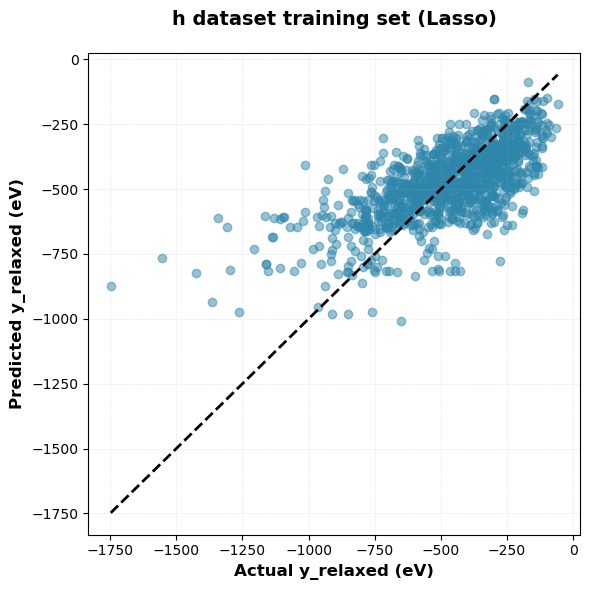

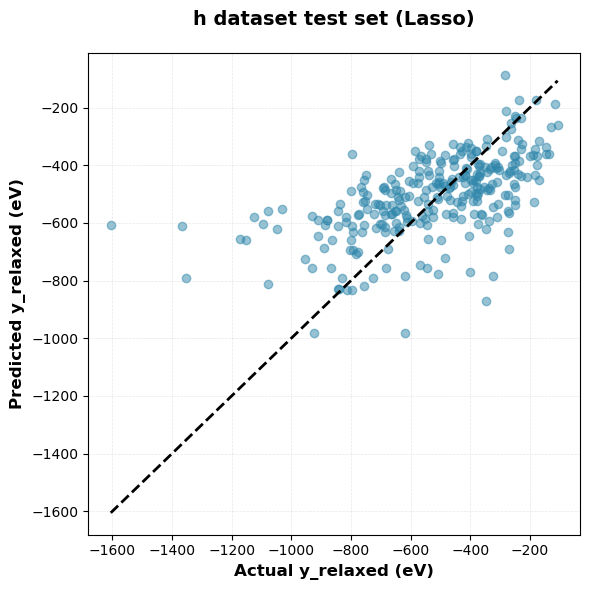

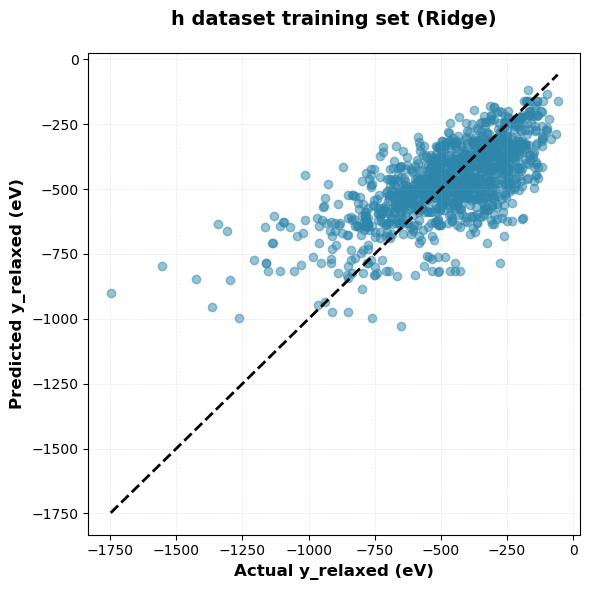

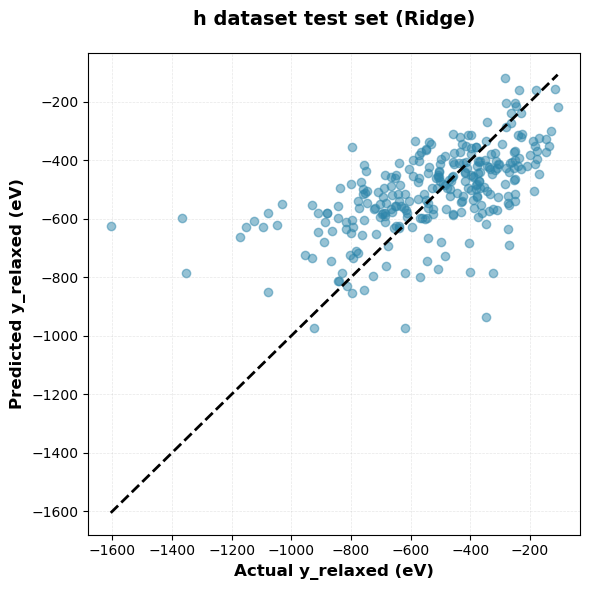

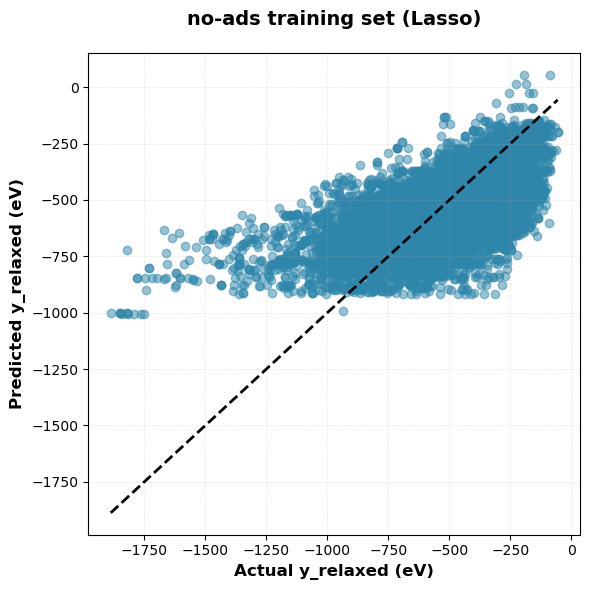

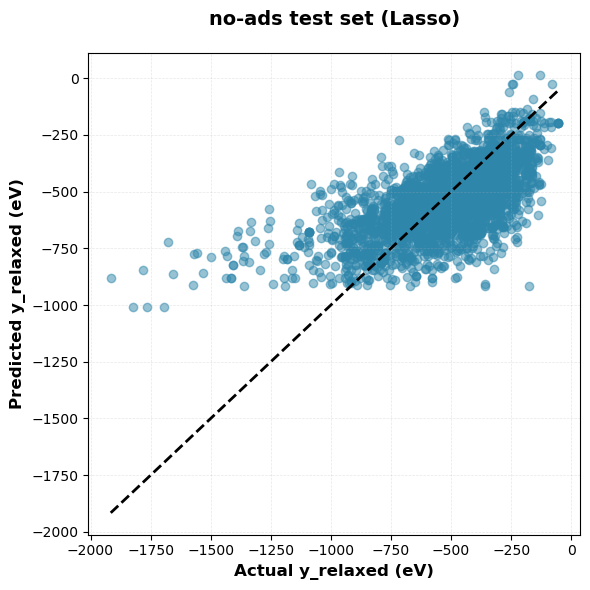

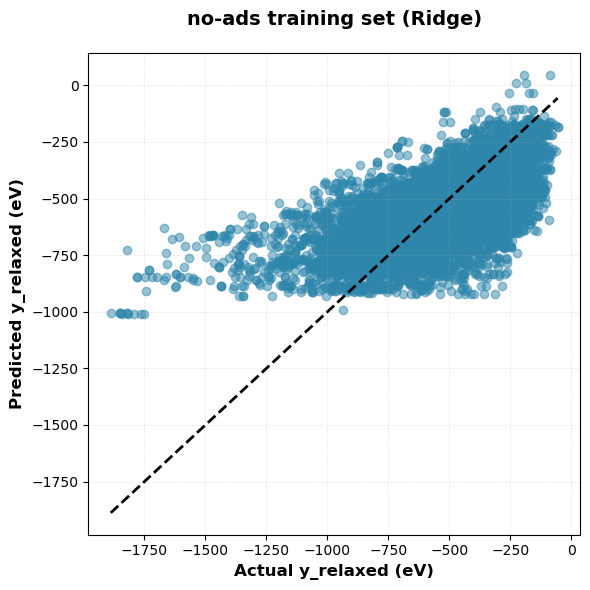

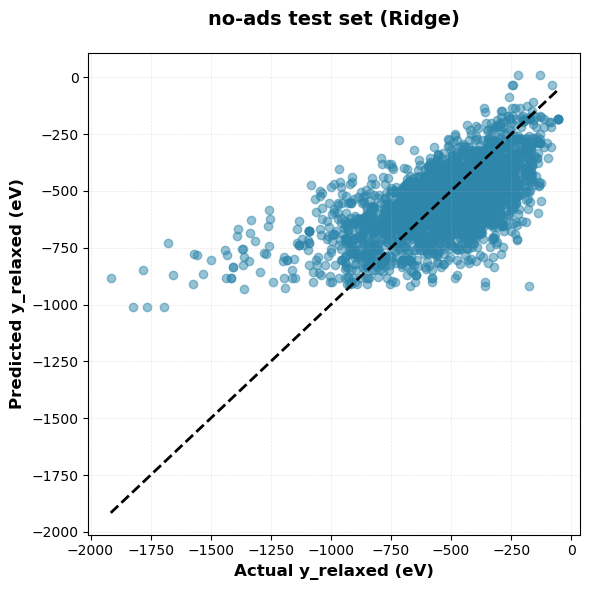

In [16]:
parity_plot(h_X_train_scaled, h_y_train, h_lasso_cv["best_model"].fit(h_X_train_scaled, h_y_train), "h dataset training set (Lasso)")
parity_plot(h_X_test_scaled, h_y_test, h_lasso_cv["best_model"].fit(h_X_train_scaled, h_y_train), "h dataset test set (Lasso)")

parity_plot(h_X_train_scaled, h_y_train, h_ridge_cv["best_model"].fit(h_X_train_scaled, h_y_train), "h dataset training set (Ridge)")
parity_plot(h_X_test_scaled, h_y_test, h_ridge_cv["best_model"].fit(h_X_train_scaled, h_y_train), "h dataset test set (Ridge)")

parity_plot(no_ads_X_train_scaled, no_ads_y_train, no_ads_lasso_cv["best_model"].fit(no_ads_X_train_scaled, no_ads_y_train), "no-ads training set (Lasso)")
parity_plot(no_ads_X_test_scaled, no_ads_y_test, no_ads_lasso_cv["best_model"].fit(no_ads_X_train_scaled, no_ads_y_train), "no-ads test set (Lasso)")

parity_plot(no_ads_X_train_scaled, no_ads_y_train, no_ads_ridge_cv["best_model"].fit(no_ads_X_train_scaled, no_ads_y_train), "no-ads training set (Ridge)")
parity_plot(no_ads_X_test_scaled, no_ads_y_test, no_ads_ridge_cv["best_model"].fit(no_ads_X_train_scaled, no_ads_y_train), "no-ads test set (Ridge)")